# Supermarket sales analysis


This project aims to leverage sales data from my local supermarket to identify best-selling items and categories 
This will help in inventory management and to know how to adjust prices so as to get more sales 

## Objectives 
1. Identify best-selling items and categories.
2. Determine sales patterns and seasonality
3. Track inventory levels and forecast demand
4. Analyze the impact of tax on overall sales

## Data 
The data used was collected from a local supermarket in Murang'a, Kenya. The data is in two parts: May and june 2024 sales data, that will be worked on differently. 

The data contains the following columns:
1. Item id - This is the unique item identifer.
2. Description - This describes the item in terms of quantity eg KENSALT 500GMS, SOKO ALL PURPOSE 2KG BALE. 
3. Qty Sold - Gives in numbers the amount /quantity of the item sold.
4. Sold Price - the price the item was sold at.
5. Total sales - gives the tota sales for the given item which is basically (Qty Sold * Sold Price)
6. Total(Tax EX) - This is the tax-excluded amount. This represents the revenue generated from sales before any sales tax is applied.
7. Sales tax - This represents the amount of tax collected on the sale of each item.

In [9]:
#importing libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [10]:
#importing data
June_sales = pd.read_csv("C:/Users/ADMIN/Documents/Supermarket-sales-analysis/June_supermarket_sales.csv")

In [11]:
June_sales.head()

,Item,Description,Qty_Sold,Sold_Price,Total_Sales,Total (Tax_Ex),Sales_Tax
0,16664,PACKING BAG #22 NON WOVEN,1.0,10,10,8.6207,1.3793
1,1430,SOKO ALL PURPOSE 2KG BALE,0.5,1920,960,960.0000,0.0000
2,310,SACHRINE SUGAR 50GMS,1.0,70,70,60.3448,9.6552
3,6.16E+12,CHAPA MANDASHI BAKING POWDER 1,2.0,40,80,68.9655,11.0345
4,6.16E+12,MOLO WHOLE MILK 500ML POUCH,1.0,60,60,60.0000,0.0000


In [12]:
June_sales.tail()

,Item,Description,Qty_Sold,Sold_Price,Total_Sales,Total (Tax_Ex),Sales_Tax
98859,17089,PACKING BAG #25 NON WOVEN,1.0,20,20,17.2414,2.7586
98860,7.92E+11,VUMA MAIZE MEAL 2KG,1.0,110,110,110.0000,0.0000
98861,6.16E+12,LOTUS NGANO 1KG,1.0,85,85,85.0000,0.0000
98862,6.16E+12,KENSALT 500GMS,1.0,20,20,17.2414,2.7586
98863,CEN,CENTRAL #22,1.0,15,15,12.9310,2.0690


## Data cleaning and validation 

Cleaning the data will consist of checking for null, empty, missing and duplicated values.

In [13]:
# Check for null values in the dataset
null_values = June_sales.isnull().sum()

print(f'Null values in each column:\n{null_values}')

Null values in each column:
Item              2
Description       9
Qty_Sold          0
Sold_Price        0
Total_Sales       0
Total (Tax_Ex)    0
Sales_Tax         0
dtype: int64


In [14]:
# rows with null values
June_sales[June_sales['Item'].isnull()]


,Item,Description,Qty_Sold,Sold_Price,Total_Sales,Total (Tax_Ex),Sales_Tax
7776,NaN,NaN,0.0,0,0,0.0000,0.0000
8257,NaN,NaN,1.0,150,150,129.3104,20.6896


In [15]:
#rows with null values
June_sales[June_sales['Description'].isnull()]

,Item,Description,Qty_Sold,Sold_Price,Total_Sales,Total (Tax_Ex),Sales_Tax
7776,NaN,NaN,0.0,0,0,0.0000,0.0000
8257,NaN,NaN,1.0,150,150,129.3104,20.6896
67398,MG1103,NaN,0.0,4500,0,0.0000,0.0000
84393,MG1103,NaN,0.0,4500,0,0.0000,0.0000
87693,--+,NaN,0.0,0,0,0.0000,0.0000
88594,--+,NaN,1.0,0,0,0.0000,0.0000
90205,--+,NaN,1.0,0,0,0.0000,0.0000
90245,MG1103,NaN,0.0,4500,0,0.0000,0.0000
96246,MG1103,NaN,0.0,4500,0,0.0000,0.0000


# Nan values 
NaN (Not a Number) values can arise in a dataset due to various reasons,eg :
1. Sensor Failures: In data collected from sensors, there might be periods when the sensor fails to record data.
2. System Errors: Automated data entry systems might encounter issues leading to missing values.

Nan values should be removed from the dataset as they :
1. can distort statistical analysis and machine learning model training because they represent unknown or missing data. Removing them ensures that the remaining data is accurate and complete.
2.  can skew statistical measures such as mean, standard deviation, and correlations. Removing them ensures that statistical analyses are based on valid and complete data
3.  can disrupt data visualization processes, making it harder to interpret and present insights effectively. Removing them can lead to clearer and more accurate visual representations.

As seen above, there are 18 null values in the item column and 19 null values in the description column.Since we have large amount of data we can delete the null values.

In [16]:
#dropping rows with null values
June_sales = June_sales.dropna()

In [17]:
null_values = June_sales.isnull().sum()

print(f'Null values in each column:\n{null_values}')

Null values in each column:
Item              0
Description       0
Qty_Sold          0
Sold_Price        0
Total_Sales       0
Total (Tax_Ex)    0
Sales_Tax         0
dtype: int64


In [18]:
#checking for duplicates 
June_sales.duplicated().sum()

90927

As above, there are 90927 duplicates. This is no cause for alarm as different customers can buy the same items hence there will be alot of duplicates. Because of this we will not delete any duplicates.

In [19]:
June_sales[June_sales['Qty_Sold']== 0]

,Item,Description,Qty_Sold,Sold_Price,Total_Sales,Total (Tax_Ex),Sales_Tax
72,1742,BIG BOM SWEET,0.0,10,0,0.0,0.0
713,BZ00345,BULB STARTER,0.0,40,0,0.0,0.0
719,6.16E+12,KIWI BLACK 100ML,0.0,240,0,0.0,0.0
800,6.16E+12,MENENGAI 1KG,0.0,190,0,0.0,0.0
858,17089,PACKING BAG #25 NON WOVEN,0.0,20,0,0.0,0.0
...,...,...,...,...,...,...,...
97466,6.16E+12,EAST AFRICA MANDAZI 180G,0.0,55,0,0.0,0.0
98112,d3,d3 toy,0.0,850,0,0.0,0.0
98314,301,CENTRAL BIRYANI 1Kg,0.0,120,0,0.0,0.0
98445,12959,CENTRAL SUGAR 1KG,0.0,135,0,0.0,0.0


As from above 748 of the items were never sold ,we will take note of them but they are not useful in the analysis hence we will drop them. 

In [21]:
June_sales.shape

(98855, 7)

In [23]:
#deleting rows where quanity sold is zero 
June_sales = June_sales[June_sales['Qty_Sold'] != 0]

In [25]:
June_sales.shape

(98107, 7)

In [26]:
#checking for missing values
June_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98107 entries, 0 to 98863
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Item            98107 non-null  object 
 1   Description     98107 non-null  object 
 2   Qty_Sold        98107 non-null  float64
 3   Sold_Price      98107 non-null  int64  
 4   Total_Sales     98107 non-null  int64  
 5   Total (Tax_Ex)  98107 non-null  float64
 6   Sales_Tax       98107 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 6.0+ MB


Looks like we have no missing values hence we are good to go.

# Exploratory data analysis (EDA)
EDA helps us to understand our data without making any assumptions.

In [27]:
June_sales.shape

(98107, 7)

The shape command shows us that we have 107085 rows of data and 7 features.

In [28]:
June_sales.describe()

,Qty_Sold,Sold_Price,Total_Sales,Total (Tax_Ex),Sales_Tax
count,98107.000000,98107.000000,98107.000000,98107.000000,98107.000000
mean,1.660019,134.529442,159.901791,144.423395,15.478396
std,17.929190,297.289038,319.964438,283.021204,41.945627
min,0.500000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,50.000000,50.000000,43.103500,0.689600
50%,1.000000,95.000000,110.000000,94.827600,8.275900
75%,1.000000,145.000000,175.000000,163.793100,18.620700
max,2500.000000,23500.000000,23500.000000,20258.620700,3241.379300


The describe() command will provide the mean, standard deviation and a five number summary of each numerical feature. 
From the summary statistics we can draw that:
1. The minimum of quantity sold was 0.5(half a kg) and the maximum was 2500 items
2. The minimum price was ksh 0. and the maximum was 23500

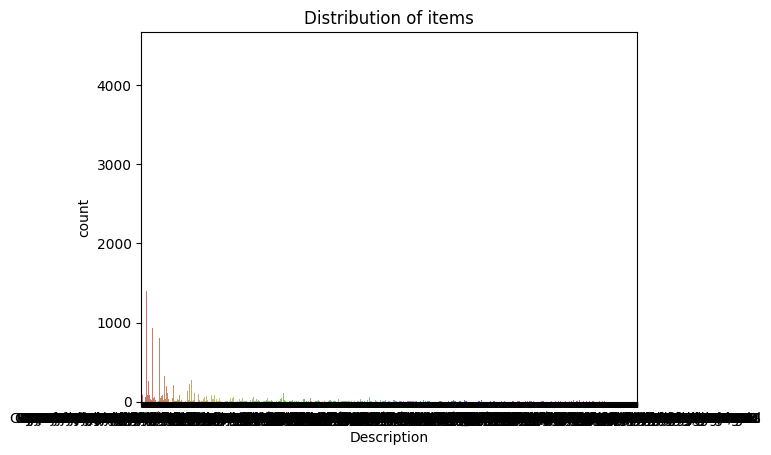

In [30]:
sns.countplot(x = 'Description', data = June_sales, palette="hls")
plt.title("Distribution of items");

The plot above is supposed to show the count of each item but there are too many items hence making it difficult to interprete and even read the plot we will therefore have to group the items to make it easier to plot. 

In [31]:
#checking unique items
len(June_sales['Description'].unique())

4502

There are 4502 unique items in the dataset. 

## List of all items 

In [32]:
# Get all unique items
unique_items = June_sales['Description'].unique()

# Print all unique items
print(unique_items)

# Optionally, convert to a list if needed
unique_items_list = unique_items.tolist()
print(unique_items_list)

['PACKING BAG #22 NON WOVEN' 'SOKO ALL PURPOSE 2KG BALE'
 'SACHRINE SUGAR 50GMS' ... 'BABY BOTTLE NS 16666'
 'SEDOSO HAIR FOOD ARGAN 80G' 'NUTEEZ PEANUT N 125G']
['PACKING BAG #22 NON WOVEN', 'SOKO ALL PURPOSE 2KG BALE', 'SACHRINE SUGAR 50GMS', 'CHAPA MANDASHI BAKING POWDER 1', 'MOLO WHOLE MILK 500ML POUCH', 'KENSALT 500GMS', 'YEGO NICE 100g', 'ARIEL LAVENDER 200G', 'GRACIES STRAWBERRY CUP 250ML', 'ROYAL YOGHURT VANILLA CUP 250M', 'JOY LITTLE HEART CAKE 300GMS', 'GRACIES PASSION 500ML CUP', "GRACIE'S VANILLA CUP 500ML", 'KCC FRESH WHOLE MILK 500ML', 'POWER PLAY DRINK ORIGINAL 400M', 'CENTRAL #22', 'VELVEX ALLUMINIUM FOIL 30CMX5M', 'VIRANI BEEF MASALA 100G', 'ROYCO CUBES BEEF FLAVOUR', 'SANTA MARIA DARK SOY SAUCE', 'TROPICAL HEAT PILAU MASALA 100', 'CENTRAL BREAD 800G', 'ROBIN  THREAD SINGLE', 'CENTRAL BIRYANI 1Kg', 'JOY SWEET HEART CAKE 150GMS', 'COCKTAIL', 'FANTA ORANGE 350ML', 'PACKING BAG #15 NON WOVEN', 'FRESH 4 GUM PELLETS', 'EGG 1 PIECE', 'INDOMIE CHICKEN FLAVOUR 5PCKS', 'CENTRAL

## Grouping 
First we will group the data by the item description so as to get and plot the first and last 30 most sold and least sold items. 

We will then sort the grouped data first by the total sales and then by the quantity sold. 

## Soring by total sales of items 

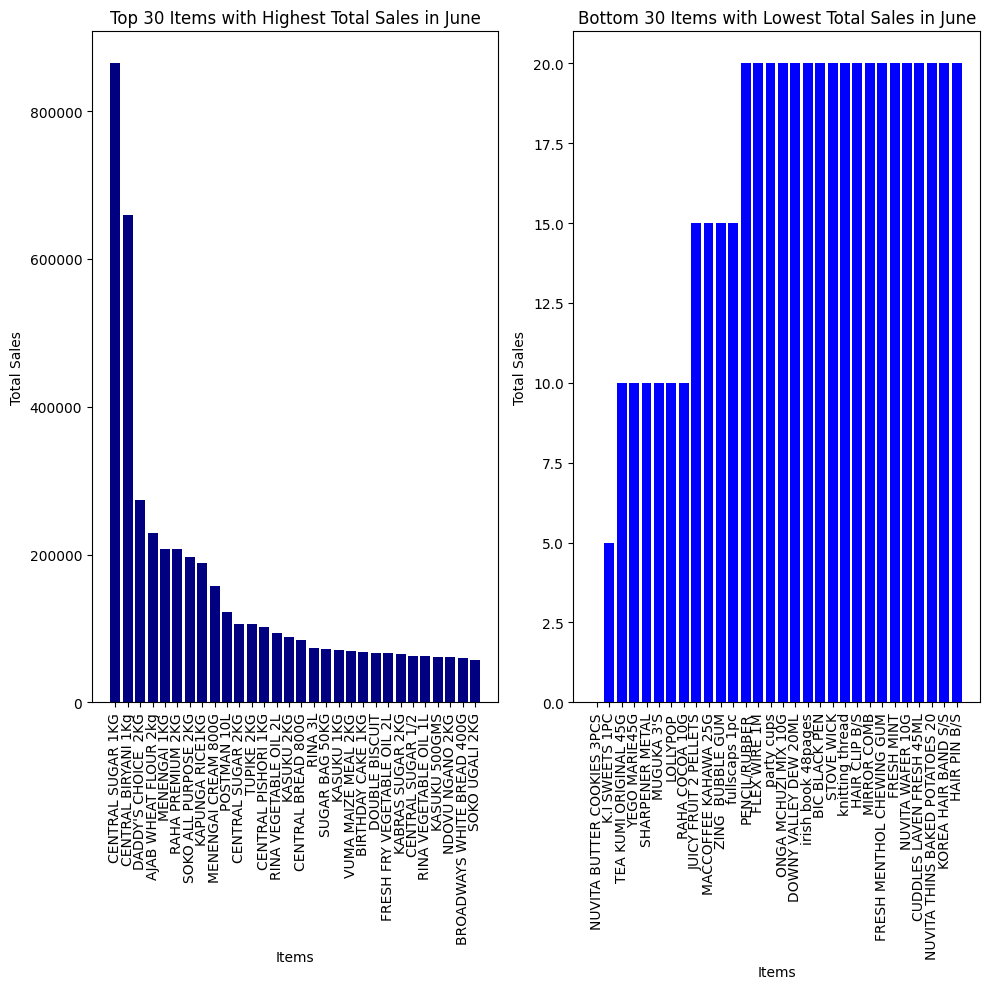

In [34]:
# Grouping by item description
description_grouping = June_sales.groupby('Description')[['Qty_Sold', 'Sold_Price', 'Total_Sales']].sum()

# Sorting the grouped data by total sales in descending order
sorted_description_grouping_desc = description_grouping['Total_Sales'].sort_values(ascending=False)

# Extracting the top 30 items with the highest total sales
top_30 = sorted_description_grouping_desc.head(30)

# Sorting the grouped data by total sales in ascending order
sorted_description_grouping_asc = description_grouping['Total_Sales'].sort_values(ascending=True)

# Extracting the bottom 30 items with the lowest total sales
bottom_30 = sorted_description_grouping_asc.head(30)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

# Plot for top 30 items with highest total sales
axs[0].bar(top_30.index, top_30, color='navy')
axs[0].set_ylabel('Total Sales')
axs[0].set_xlabel('Items')
axs[0].set_title('Top 30 Items with Highest Total Sales in June')
axs[0].tick_params(axis='x', rotation=90)

# Plot for bottom 30 items with lowest total sales
axs[1].bar(bottom_30.index, bottom_30, color='blue')
axs[1].set_ylabel('Total Sales')
axs[1].set_xlabel('Items')
axs[1].set_title('Bottom 30 Items with Lowest Total Sales in June')
axs[1].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plots
plt.show()


Most of the least bought items are under the foodstuff category.There are a few stationeris and medicine.There is just one item under the toiletries category. This might be due to the fact students were going back to school and did their toiletries shopping there. 
Since the supermarket is in a town with several bookshops and chemists thing can explain the low sales from the stationeries and medicine. 

# Soring by quantity sold 

## Top 30 most sold items 

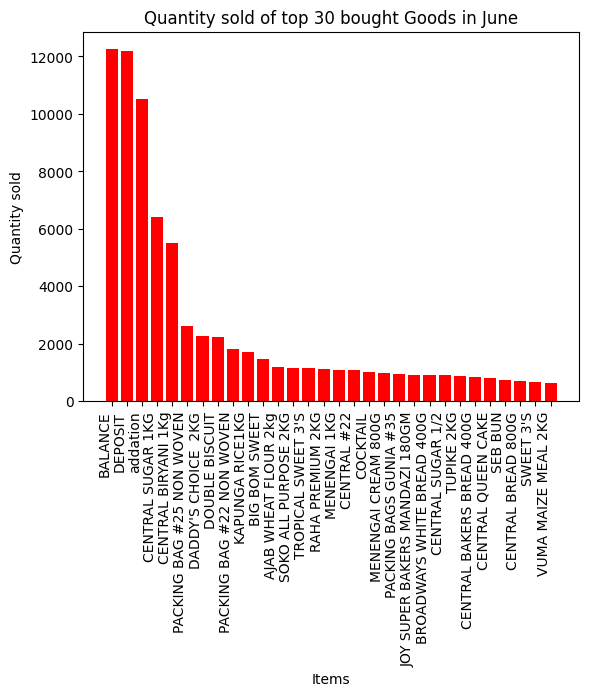

In [35]:
# Grouping by item description
description_grouping = June_sales.groupby('Description')[['Qty_Sold', 'Sold_Price', 'Total_Sales']].sum()

# Sorting the grouped data by the total sales in descending order
sorted_description_grouping = description_grouping['Qty_Sold'].sort_values(ascending= False)

# Extracting the top 30 items with the highest total sales
top_30 = sorted_description_grouping.head(30)

# Getting the indexes of the top 30 items (item descriptions)
item_description = top_30.index

# Plotting the data
plt.bar(item_description, top_30, color='red')

# Set x and y-axis titles
plt.ylabel('Quantity sold')
plt.xlabel('Items')

# Set graph title
plt.title('Quantity sold of top 30 bought Goods in June')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Show graph
plt.show()

Most of the items are food stuffs , most of them as expected are in the top 30 items with highest total sales. 
From the bar plot we can see that one of the most bought item are the packing bags showing that most people don't carry / don't reuse shopping bags as they go to the supermarket. 

The balance,deposit and addation 'items' are irrelevant hence we delete them. 

In [36]:
June_sales.shape

(98107, 7)

In [37]:
June_sales = June_sales[June_sales['Description'] != 'DEPOSIT']

June_sales = June_sales[June_sales['Description'] != 'BALANCE']

June_sales = June_sales[June_sales['Description'] != 'addation']

In [38]:
June_sales.shape

(97966, 7)

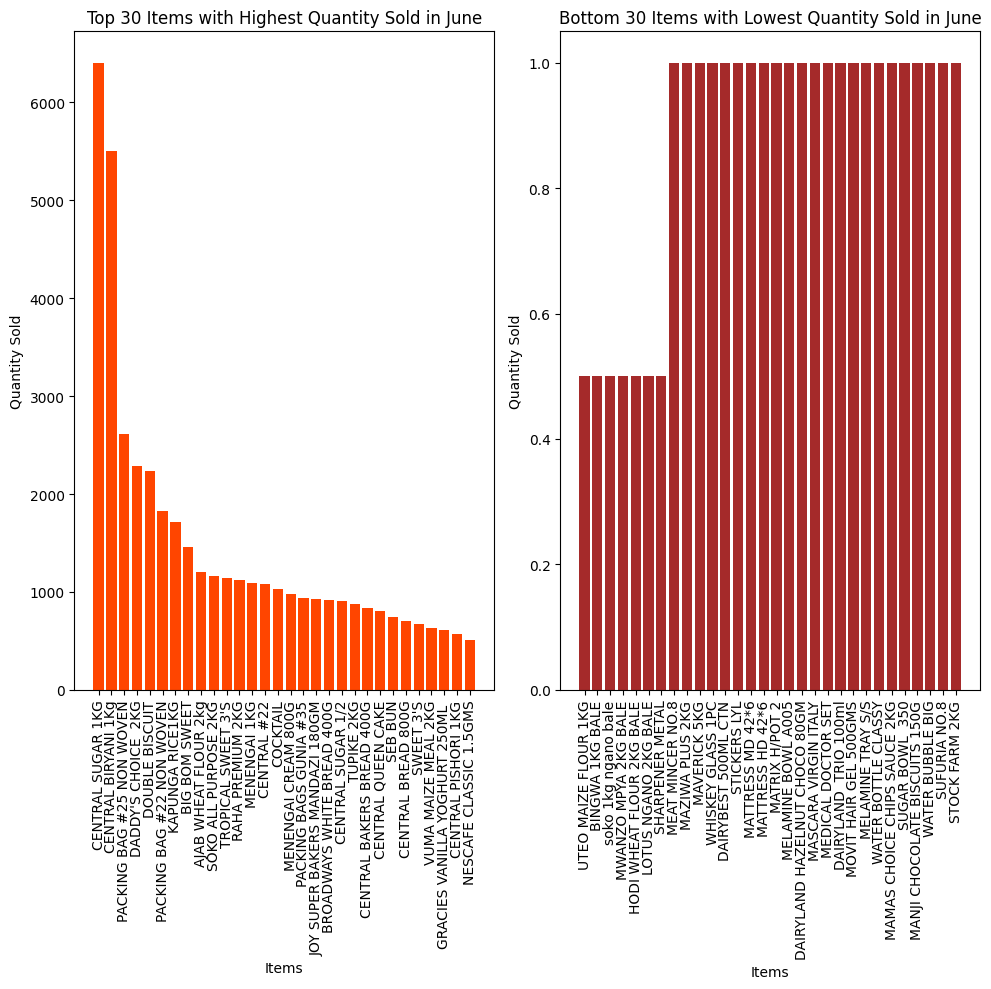

In [39]:
# Grouping by item description
description_grouping = June_sales.groupby('Description')[['Qty_Sold', 'Sold_Price', 'Total_Sales']].sum()

# Sorting the grouped data by the quantity sold in descending order
sorted_description_grouping_desc = description_grouping['Qty_Sold'].sort_values(ascending=False)

# Extracting the top 30 items with the highest quantity sold
top_30 = sorted_description_grouping_desc.head(30)

# Sorting the grouped data by the quantity sold in ascending order
sorted_description_grouping_asc = description_grouping['Qty_Sold'].sort_values(ascending=True)

# Extracting the bottom 30 items with the lowest quantity sold
bottom_30 = sorted_description_grouping_asc.head(30)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

# Plot for top 30 items with highest quantity sold
axs[0].bar(top_30.index, top_30, color='orangered')
axs[0].set_ylabel('Quantity Sold')
axs[0].set_xlabel('Items')
axs[0].set_title('Top 30 Items with Highest Quantity Sold in June')
axs[0].tick_params(axis='x', rotation=90)

# Plot for bottom 30 items with lowest quantity sold
axs[1].bar(bottom_30.index, bottom_30, color='brown')
axs[1].set_ylabel('Quantity Sold')
axs[1].set_xlabel('Items')
axs[1].set_title('Bottom 30 Items with Lowest Quantity Sold in June')
axs[1].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plots
plt.show()


The bar graph above shows that goods bought in bales are the least bought(quantity wise) this is because they are not counted as pieces .....eg 1 bale of maize flour has 24 2kg pieces. 
Looks like most toiletries are the hav ethe least bought items in quantity. 

## Analysis by sales tax

Now let's look at the impact of tax on prices of goods and sales
We'll look at the sales tax 

In [40]:
June_sales.head()

,Item,Description,Qty_Sold,Sold_Price,Total_Sales,Total (Tax_Ex),Sales_Tax
0,16664,PACKING BAG #22 NON WOVEN,1.0,10,10,8.6207,1.3793
1,1430,SOKO ALL PURPOSE 2KG BALE,0.5,1920,960,960.0000,0.0000
2,310,SACHRINE SUGAR 50GMS,1.0,70,70,60.3448,9.6552
3,6.16E+12,CHAPA MANDASHI BAKING POWDER 1,2.0,40,80,68.9655,11.0345
4,6.16E+12,MOLO WHOLE MILK 500ML POUCH,1.0,60,60,60.0000,0.0000


Since there are many duplicates in the dataset, and each item can have different quantity sold hence different sales tax value. Let us look at one item. 

In [41]:
June_sales[June_sales['Description'] == 'DOUBLE BISCUIT']

,Item,Description,Qty_Sold,Sold_Price,Total_Sales,Total (Tax_Ex),Sales_Tax
167,D30,DOUBLE BISCUIT,1.0,30,30,25.8621,4.1379
182,D30,DOUBLE BISCUIT,1.0,30,30,25.8621,4.1379
216,D30,DOUBLE BISCUIT,1.0,30,30,25.8621,4.1379
236,D30,DOUBLE BISCUIT,1.0,30,30,25.8621,4.1379
311,D30,DOUBLE BISCUIT,1.0,30,30,25.8621,4.1379
...,...,...,...,...,...,...,...
98514,D30,DOUBLE BISCUIT,3.0,30,90,77.5862,12.4138
98559,D30,DOUBLE BISCUIT,2.0,30,60,51.7241,8.2759
98582,D30,DOUBLE BISCUIT,2.0,30,60,51.7241,8.2759
98653,D30,DOUBLE BISCUIT,1.0,30,30,25.8621,4.1379


The value of the sales tax is dependant on the quantity sold. This is difficult to work with. We will therefore create a new column that calculates individual sales tax, basically sales tax (total) divided by the quantity sold. 

In [42]:
June_sales['Individual_sales_tax'] = June_sales['Sales_Tax'] / June_sales['Qty_Sold']


Let's look at the double biscuit again.

In [43]:
June_sales[June_sales['Description'] == 'DOUBLE BISCUIT']

,Item,Description,Qty_Sold,Sold_Price,Total_Sales,Total (Tax_Ex),Sales_Tax,Individual_sales_tax
167,D30,DOUBLE BISCUIT,1.0,30,30,25.8621,4.1379,4.137900
182,D30,DOUBLE BISCUIT,1.0,30,30,25.8621,4.1379,4.137900
216,D30,DOUBLE BISCUIT,1.0,30,30,25.8621,4.1379,4.137900
236,D30,DOUBLE BISCUIT,1.0,30,30,25.8621,4.1379,4.137900
311,D30,DOUBLE BISCUIT,1.0,30,30,25.8621,4.1379,4.137900
...,...,...,...,...,...,...,...,...
98514,D30,DOUBLE BISCUIT,3.0,30,90,77.5862,12.4138,4.137933
98559,D30,DOUBLE BISCUIT,2.0,30,60,51.7241,8.2759,4.137950
98582,D30,DOUBLE BISCUIT,2.0,30,60,51.7241,8.2759,4.137950
98653,D30,DOUBLE BISCUIT,1.0,30,30,25.8621,4.1379,4.137900


This is easier to work with now. 

In [44]:
June_sales.head()

,Item,Description,Qty_Sold,Sold_Price,Total_Sales,Total (Tax_Ex),Sales_Tax,Individual_sales_tax
0,16664,PACKING BAG #22 NON WOVEN,1.0,10,10,8.6207,1.3793,1.37930
1,1430,SOKO ALL PURPOSE 2KG BALE,0.5,1920,960,960.0000,0.0000,0.00000
2,310,SACHRINE SUGAR 50GMS,1.0,70,70,60.3448,9.6552,9.65520
3,6.16E+12,CHAPA MANDASHI BAKING POWDER 1,2.0,40,80,68.9655,11.0345,5.51725
4,6.16E+12,MOLO WHOLE MILK 500ML POUCH,1.0,60,60,60.0000,0.0000,0.00000


Some of the goods seem to be tax free, let's have a  look at them.

In [45]:
No_tax = June_sales[June_sales['Individual_sales_tax']== 0]

In [46]:
No_tax.head(40)

,Item,Description,Qty_Sold,Sold_Price,Total_Sales,Total (Tax_Ex),Sales_Tax,Individual_sales_tax
1,1430,SOKO ALL PURPOSE 2KG BALE,0.5,1920,960,960.0,0.0,0.0
4,6.16E+12,MOLO WHOLE MILK 500ML POUCH,1.0,60,60,60.0,0.0,0.0
25,301,CENTRAL BIRYANI 1Kg,2.0,120,240,240.0,0.0,0.0
33,C60,CENTRAL BAKERS BREAD 400G,1.0,60,60,60.0,0.0,0.0
34,6.17E+12,TUPIKE 2KG,1.0,120,120,120.0,0.0,0.0
37,6.16E+12,RINGOZ BAREQUE 15G,2.0,10,20,20.0,0.0,0.0
40,C60,CENTRAL BAKERS BREAD 400G,2.0,60,120,120.0,0.0,0.0
53,6.92E+11,DADDY'S CHOICE 2KG,3.0,120,360,360.0,0.0,0.0
55,6.01E+12,FAMILA UJIMIX 1KG(SOUR),1.0,165,165,165.0,0.0,0.0
60,C65,CENTRAL SWEET BREAD 400GM,1.0,65,65,65.0,0.0,0.0


In [47]:
No_tax.tail()

,Item,Description,Qty_Sold,Sold_Price,Total_Sales,Total (Tax_Ex),Sales_Tax,Individual_sales_tax
98848,6.16E+12,SUPA LOAF WHITE 400G,1.0,65,65,65.0,0.0,0.0
98851,301,CENTRAL BIRYANI 1Kg,1.0,120,120,120.0,0.0,0.0
98853,6.16E+12,TUZO 200ML,2.0,30,60,60.0,0.0,0.0
98860,7.92E+11,VUMA MAIZE MEAL 2KG,1.0,110,110,110.0,0.0,0.0
98861,6.16E+12,LOTUS NGANO 1KG,1.0,85,85,85.0,0.0,0.0


Most of them are food stuffs . We can remove them since they do not aid with the tax analysis

In [48]:
June_sales.shape

(97966, 8)

In [50]:
June_sales = June_sales[June_sales['Individual_sales_tax'] != 0]

In [51]:
June_sales.shape

(74149, 8)

In [52]:
June_sales.head()

,Item,Description,Qty_Sold,Sold_Price,Total_Sales,Total (Tax_Ex),Sales_Tax,Individual_sales_tax
0,16664,PACKING BAG #22 NON WOVEN,1.0,10,10,8.6207,1.3793,1.37930
2,310,SACHRINE SUGAR 50GMS,1.0,70,70,60.3448,9.6552,9.65520
3,6.16E+12,CHAPA MANDASHI BAKING POWDER 1,2.0,40,80,68.9655,11.0345,5.51725
5,6.16E+12,KENSALT 500GMS,1.0,20,20,17.2414,2.7586,2.75860
6,6.16E+12,YEGO NICE 100g,1.0,35,35,30.1724,4.8276,4.82760


In [53]:
len(June_sales['Description'].unique())

3976

In [54]:
#get unique item description so at to work with unique items
unique_rows = June_sales.drop_duplicates(subset='Description')

In [55]:
unique_rows.shape

(3976, 8)

In [56]:
unique_rows.head()

,Item,Description,Qty_Sold,Sold_Price,Total_Sales,Total (Tax_Ex),Sales_Tax,Individual_sales_tax
0,16664,PACKING BAG #22 NON WOVEN,1.0,10,10,8.6207,1.3793,1.37930
2,310,SACHRINE SUGAR 50GMS,1.0,70,70,60.3448,9.6552,9.65520
3,6.16E+12,CHAPA MANDASHI BAKING POWDER 1,2.0,40,80,68.9655,11.0345,5.51725
5,6.16E+12,KENSALT 500GMS,1.0,20,20,17.2414,2.7586,2.75860
6,6.16E+12,YEGO NICE 100g,1.0,35,35,30.1724,4.8276,4.82760


In [57]:
unique_rows.describe()

,Qty_Sold,Sold_Price,Total_Sales,Total (Tax_Ex),Sales_Tax,Individual_sales_tax
count,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000,3976.000000
mean,1.222334,354.694165,377.003270,325.002820,52.000449,48.923331
std,1.442784,980.128334,996.296973,858.876701,137.420272,135.190115
min,0.500000,1.000000,5.000000,4.310400,0.689600,0.137920
25%,1.000000,75.000000,80.000000,68.965500,11.034500,10.344800
50%,1.000000,150.000000,157.500000,135.775850,21.724150,20.689600
75%,1.000000,290.000000,300.000000,258.620700,41.379300,40.000000
max,50.000000,23500.000000,23500.000000,20258.620700,3241.379300,3241.379300


In [58]:
#sort the rows by the individual sales tax column 
sorted_rows = unique_rows.sort_values(by='Individual_sales_tax', ascending=True)  

# Display the sorted DataFrame
print(sorted_rows)


              Item              Description  Qty_Sold  Sold_Price  \
54436  K.I SWEETTS           K.I SWEETS 1PC       5.0           1   
628           GOAL              GOAL SWEETS      15.0           1   
2113        100015             envelope m/s      50.0           2   
13250           78             MATCHBOX 1PC       1.0           5   
30565       256985                SONAPLAST       1.0           5   
...            ...                      ...       ...         ...   
84169      SHT1131  SAYONA SUBWOOFER 1131BT       1.0       13900   
61755        33020     VITRON 32'' SMART TV       1.0       15000   
34153        AL120          AILYONS 32'' TV       1.0       15000   
42551        50182   PREMIER SPEAKER SYSTEM       1.0       16000   
4409         30936     VITRON SMART 43'' TV       1.0       23500   

       Total_Sales  Total (Tax_Ex)  Sales_Tax  Individual_sales_tax  
54436            5          4.3104     0.6896              0.137920  
628             15         12.9

# Top 30 items with highest tax and bottom 30 items with lowest tax

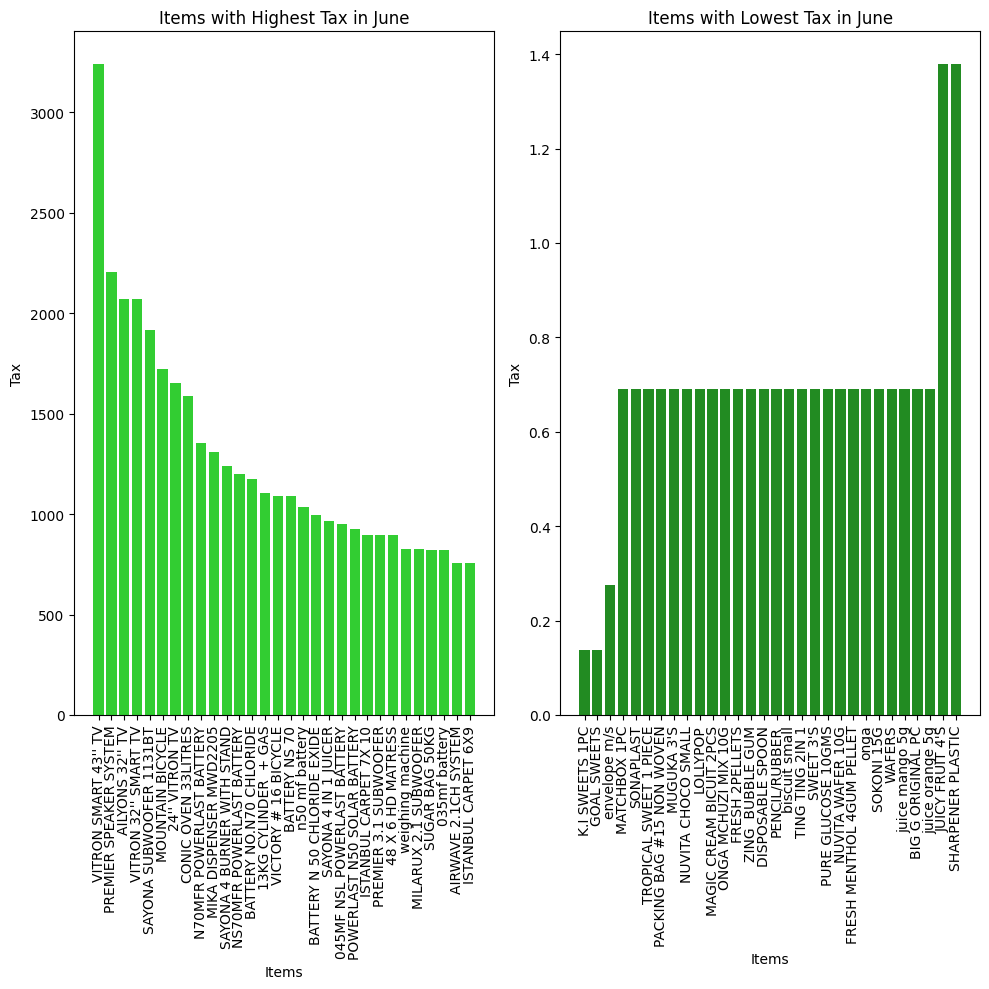

In [59]:
# Data for items with highest tax
items_with_highest_tax = sorted_rows.tail(30)
sorted_items_with_highest_tax = items_with_highest_tax.sort_values(by='Individual_sales_tax', ascending=False)

item_description_highest = sorted_items_with_highest_tax['Description']
tax_highest = sorted_items_with_highest_tax['Individual_sales_tax']


# Data for items with lowest tax
items_with_lowest_tax = sorted_rows.head(30)
item_description_lowest = items_with_lowest_tax['Description']
tax_lowest = items_with_lowest_tax['Individual_sales_tax']


# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

# Plot for items with highest tax
axs[0].bar(item_description_highest, tax_highest, color='limegreen')
axs[0].set_ylabel('Tax')
axs[0].set_xlabel('Items')
axs[0].set_title('Items with Highest Tax in June')
axs[0].tick_params(axis='x', rotation=90)

# Plot for items with lowest tax
axs[1].bar(item_description_lowest, tax_lowest, color='forestgreen')
axs[1].set_ylabel('Tax')
axs[1].set_xlabel('Items')
axs[1].set_title('Items with Lowest Tax in June')
axs[1].tick_params(axis='x', rotation=90)


# Adjust layout to prevent overlap
plt.tight_layout()

# Show plots
plt.show()


In [1]:
#importing libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data
June_sales = pd.read_csv("C:/Users/ADMIN/Documents/Supermarket-sales-analysis/June_supermarket_sales.csv")

In [3]:
June_sales.head()

,Item,Description,Qty_Sold,Sold_Price,Total_Sales,Total (Tax_Ex),Sales_Tax
0,16664,PACKING BAG #22 NON WOVEN,1.0,10,10,8.6207,1.3793
1,1430,SOKO ALL PURPOSE 2KG BALE,0.5,1920,960,960.0000,0.0000
2,310,SACHRINE SUGAR 50GMS,1.0,70,70,60.3448,9.6552
3,6.16E+12,CHAPA MANDASHI BAKING POWDER 1,2.0,40,80,68.9655,11.0345
4,6.16E+12,MOLO WHOLE MILK 500ML POUCH,1.0,60,60,60.0000,0.0000


In [4]:
# Check for null values in the dataset
null_values = June_sales.isnull().sum()

print(f'Null values in each column:\n{null_values}')

Null values in each column:
Item              2
Description       9
Qty_Sold          0
Sold_Price        0
Total_Sales       0
Total (Tax_Ex)    0
Sales_Tax         0
dtype: int64


In [5]:
June_sales = June_sales.dropna()

In [6]:
#checking for duplicates 
June_sales.duplicated().sum()

90927

In [7]:
June_sales[June_sales['Qty_Sold']== 0]

,Item,Description,Qty_Sold,Sold_Price,Total_Sales,Total (Tax_Ex),Sales_Tax
72,1742,BIG BOM SWEET,0.0,10,0,0.0,0.0
713,BZ00345,BULB STARTER,0.0,40,0,0.0,0.0
719,6.16E+12,KIWI BLACK 100ML,0.0,240,0,0.0,0.0
800,6.16E+12,MENENGAI 1KG,0.0,190,0,0.0,0.0
858,17089,PACKING BAG #25 NON WOVEN,0.0,20,0,0.0,0.0
...,...,...,...,...,...,...,...
97466,6.16E+12,EAST AFRICA MANDAZI 180G,0.0,55,0,0.0,0.0
98112,d3,d3 toy,0.0,850,0,0.0,0.0
98314,301,CENTRAL BIRYANI 1Kg,0.0,120,0,0.0,0.0
98445,12959,CENTRAL SUGAR 1KG,0.0,135,0,0.0,0.0


In [8]:
June_sales = June_sales[June_sales['Qty_Sold']!= 0]